#***Girvan-Newman***

In [22]:
import networkx as nx
import pandas as pd
from networkx.algorithms.community import girvan_newman
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta
import itertools

In [23]:
# Load the data from CSV (make sure the CSV has the appropriate columns)
file_path = 'call_records.csv'  # Path to your CSV file
df = pd.read_csv(file_path)
print(df.head())

   Calling Party  Called Party             IMEI             IMSI   Call Date  \
0     7806566906    7138293654   62562145495284  718316146034816  2024-08-13   
1     8581916045    8366256065   56867908299113  137911514839499  2024-05-07   
2     8546153259    7028705640  230776734184963  700140413585133  2024-10-25   
3     7982574554    8754470786  135125722662329  161145201063753  2024-11-26   
4     7028705640    8566239944  253463756543498    5803058135918  2024-10-11   

  Call Type Start Time  End Time  Duration (seconds)  
0    SMS In   06:25:50       NaN                   0  
1    SMS In   23:11:17       NaN                   0  
2  Voice In   00:57:08  02:16:59                4791  
3    SMS In   23:11:24       NaN                   0  
4  Voice In   18:44:51  19:21:41                2210  


In [24]:
# Creating the Graph (undirected, weighted by call duration)
G = nx.Graph()

# Adding edges with weights (call durations)
for _, row in df.iterrows():
    # Ensure there is a valid call duration and that calling/called party are in the same graph
    if pd.notna(row['Duration (seconds)']) and row['Duration (seconds)'] > 0:
        G.add_edge(row['Calling Party'], row['Called Party'], weight=row['Duration (seconds)'])
G.remove_edges_from(nx.selfloop_edges(G))

In [25]:
# Calculate the Girvan-Newman algorithm
comp = girvan_newman(G)

In [26]:
# Find the communities with the highest modularity
k = 10  # You can adjust this parameter for different granularity of communities.
limited = itertools.takewhile(lambda c: len(c) <= k, comp)

# Get the first community structure with the desired number of communities
communities = next(limited)

In [27]:
# Print the communities
print("Communities detected by Girvan-Newman:")
for idx, community in enumerate(communities):
    print(f"Community {idx + 1}: {set(community)}")

Communities detected by Girvan-Newman:
Community 1: {8754470786, 7871757573, 8684364166, 8581916045, 8158925965, 8836388495, 8533504784, 8227392916, 7939465365, 7781243798, 9522978199, 7460333207, 7769490335, 7958574881, 7348070948, 8546153259, 8043138732, 9726339577, 8849351086, 8334673086, 8298280128, 8366256065, 7014841668, 7927181126, 8566239944, 9514458697, 9242792393, 7970519500, 7168269389, 9900284751, 9455651921, 7045493330, 8532263127, 7982574554, 9680252122, 9469770332, 9974178652, 8098153439, 9860867430, 7031600359, 7028705640, 9893158376, 7609902824, 9269614701, 7640598641, 7716701810, 7263541753, 7806566906, 9716047486}
Community 2: {7138293654}


In [28]:
# Calculating Modularity Score
modularity_score = nx.algorithms.community.modularity(G, communities)
print(f"Modularity Score: {modularity_score}")

Modularity Score: -9.509150250510262e-05


In [29]:
# Color nodes based on community assignment
color_map = {}
for idx, community in enumerate(communities):
    for node in community:
        color_map[node] = idx

# Creating a list of colors for the nodes
node_colors = [color_map.get(node, 0) for node in G.nodes()]

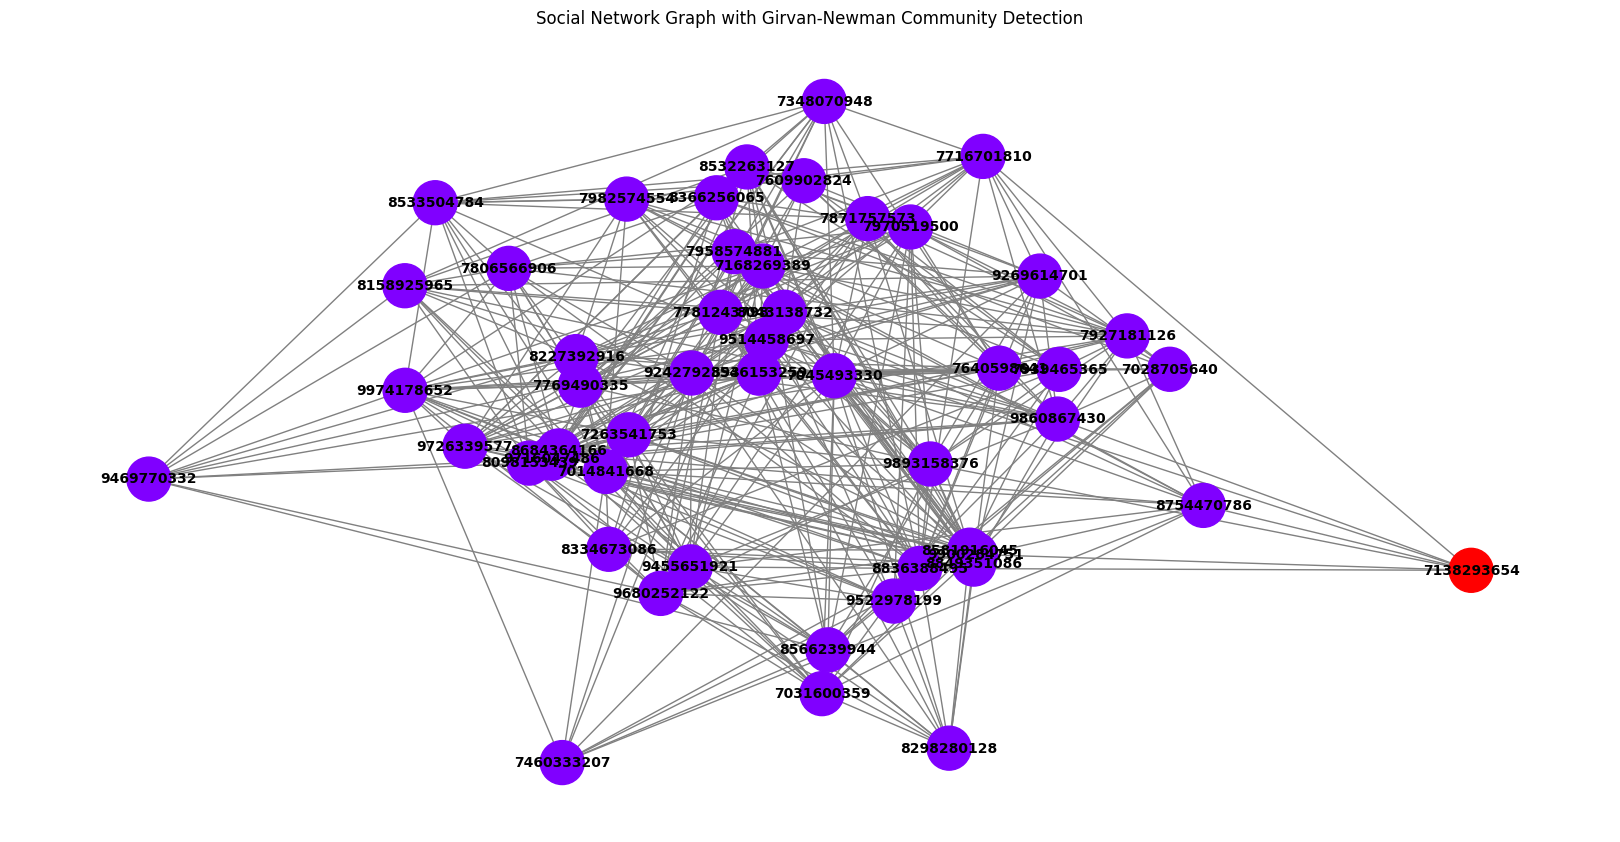

In [30]:
# Drawing the graph with different colors for each community
plt.figure(figsize=(16, 8))
pos = nx.spring_layout(G, seed=25)
nx.draw(G, pos, with_labels=True, node_size=1000,
        node_color=node_colors, cmap=plt.cm.rainbow,
        font_size=10, font_weight='bold', edge_color='gray')

# Display the plot
plt.title("Social Network Graph with Girvan-Newman Community Detection")
plt.show()

#***Louvain***

In [31]:
!pip install python-louvain

In [32]:
import pandas as pd
import random
import networkx as nx
import matplotlib.pyplot as plt
import community.community_louvain as cl

In [33]:
# Load the data from CSV (make sure the CSV has the appropriate columns)
file_path = 'call_records.csv'  # Path to your CSV file
df = pd.read_csv(file_path)
print(df.head())

   Calling Party  Called Party             IMEI             IMSI   Call Date  \
0     7806566906    7138293654   62562145495284  718316146034816  2024-08-13   
1     8581916045    8366256065   56867908299113  137911514839499  2024-05-07   
2     8546153259    7028705640  230776734184963  700140413585133  2024-10-25   
3     7982574554    8754470786  135125722662329  161145201063753  2024-11-26   
4     7028705640    8566239944  253463756543498    5803058135918  2024-10-11   

  Call Type Start Time  End Time  Duration (seconds)  
0    SMS In   06:25:50       NaN                   0  
1    SMS In   23:11:17       NaN                   0  
2  Voice In   00:57:08  02:16:59                4791  
3    SMS In   23:11:24       NaN                   0  
4  Voice In   18:44:51  19:21:41                2210  


In [34]:
# Creating the Graph (undirected, weighted by call duration)
G = nx.Graph()

# Adding edges with weights (call durations)
for _, row in df.iterrows():
    # Ensure there is a valid call duration and that calling/called party are in the same graph
    if pd.notna(row['Duration (seconds)']) and row['Duration (seconds)'] > 0:
        G.add_edge(row['Calling Party'], row['Called Party'], weight=row['Duration (seconds)'])
G.remove_edges_from(nx.selfloop_edges(G))

In [35]:
# Calculate the Louvain algorithm
partition = cl.best_partition(G)

In [36]:
# Print detected communities
print("Communities detected by Louvain:")

# In partition, each node is mapped to a community label (integer)
communities = {}
for node, community in partition.items():
    if community not in communities:
        communities[community] = []
    communities[community].append(node)

# Sort communities by the community label (key)
for idx in sorted(communities.keys()):
    print(f"Community {idx + 1}: {communities[idx]}")

Communities detected by Louvain:
Community 1: [8546153259, 7716701810, 9514458697, 9716047486, 7781243798, 8533504784, 7982574554, 7014841668, 7871757573, 9974178652, 7348070948]
Community 2: [7028705640, 8566239944, 9522978199, 7927181126, 7970519500, 8836388495, 7640598641, 7460333207]
Community 3: [7939465365, 8098153439, 8334673086, 7045493330, 8366256065, 8849351086, 8581916045, 9680252122, 9726339577, 8298280128, 9900284751, 7031600359, 9893158376]
Community 4: [9242792393, 9469770332, 7806566906, 8158925965, 9455651921, 7769490335, 7958574881, 7263541753, 8684364166, 7168269389, 8227392916]
Community 5: [7609902824, 8532263127, 9860867430, 8043138732, 9269614701, 8754470786, 7138293654]


In [37]:
# Calculate and print Modularity Score
modularity_score = cl.modularity(partition, G)
print(f"Modularity Score: {modularity_score}")

Modularity Score: 0.19893757173969234


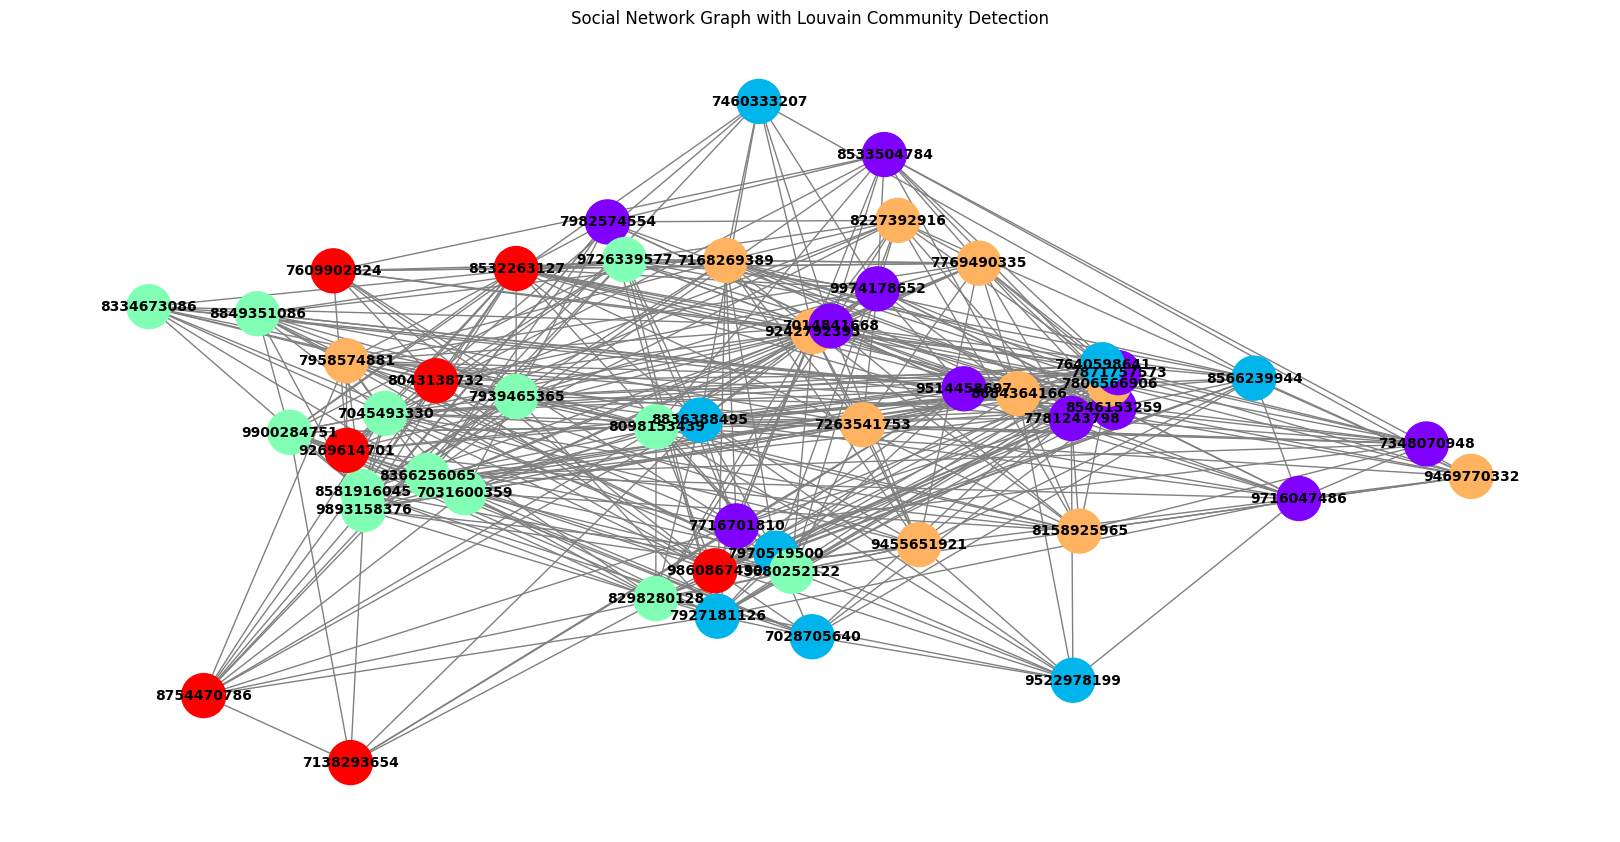

In [38]:
# Color nodes based on community assignment
node_colors = [partition.get(node, 0) for node in G.nodes()]

# Draw the graph with colored nodes based on community
plt.figure(figsize=(16, 8))
pos = nx.spring_layout(G, seed=50)  # Ensure consistent layout across runs
nx.draw(G, pos, with_labels=True, node_size=1000, node_color=node_colors, cmap=plt.cm.rainbow, font_size=10, font_weight='bold', edge_color='gray')

# Display the plot with a title
plt.title("Social Network Graph with Louvain Community Detection")
plt.show()